In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Hyperparameters:

In [53]:
Learning_rate = 1e-4
Training_iterations = 2500
Dropout = 0.5
Batch_size = 50
Validation_size = 2000

Data Preparation:

In [5]:
data = pd.read_csv('train.csv')
print('data({0[0]},{0[1]})'.format(data.shape))
print(data.head())

data(42000,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0   

Display one of the images:

In [6]:
images = data.iloc[:,1:].values
images = images.astype(np.float)

images = np.multiply(images, 1.0 /255.0)
print('images({0[0]},{0[1]})'.format(images.shape))


images(42000,784)


In [7]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

image_width=image_height =np.ceil(np.sqrt(image_size)).astype(np.uint8)

print('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


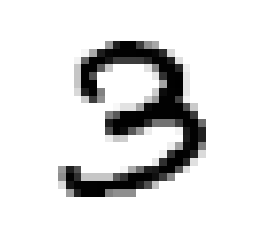

In [8]:
# display image

def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images[14])

Flattening the dataset

In [47]:
labels_flat = data.iloc[:,0]
#.values.ravel()

print('labels_flat({0})'.format(len(labels_flat)))
print('labels_flat[{0}] => {1}'.format(14,labels_flat[14]))


labels_flat(42000)
labels_flat[14] => 3


In [48]:
#unique number of labels

labels_count = np.unique(labels_flat).shape[0]
print('labels_count => {0}'.format(labels_count))

labels_count => 10


Converting into One_hot to better deal with categorical info

In [50]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels)*num_classes
    labels_one_hot = np.zeros((num_labels,num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print('labels({0[0]}, {0[1]})'.format(labels.shape))
print('labels[{0}] => {1}'.format(14, labels[14]))

labels(42000, 10)
labels[14] => [0 0 0 1 0 0 0 0 0 0]


Splitting up the dataset:

In [55]:
validation_images = images[:Validation_size]
validation_labels = labels[:Validation_size]

train_images = images[Validation_size:]
train_labels = labels[Validation_size:]

print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))

train_images(40000,784)
validation_images(2000,784)


Structuring the Neural Network:

Convolutions, pooling, padding, stride length